First import libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [134]:
headers = ['#iterations', '#propagations', '#samples', '#nn_queries', 'time', 'success']
raw_data = pd.read_csv('/tmp/test_output2.csv')
raw_data.columns = headers
print 'The data has %i elements, here is the head:' % len(raw_data)
raw_data.head()


The data has 999 elements, here is the head:


,#iterations,#propagations,#samples,#nn_queries,time,success
0,484,780,484,0,1.752470,1
1,447,735,447,0,1.685430,1
2,348,545,348,0,1.221610,1
3,126,193,126,0,0.436519,1
4,485,763,485,0,1.758560,1


Here are some stats:

In [135]:
raw_data.describe()

,#iterations,#propagations,#samples,#nn_queries,time,success
count,999.000000,999.000000,999.000000,999.0,999.000000,999.0
mean,319.301301,509.941942,319.301301,0.0,1.199982,1.0
std,242.618763,388.560267,242.618763,0.0,0.914587,0.0
min,5.000000,7.000000,5.000000,0.0,0.017746,1.0
25%,136.500000,219.500000,136.500000,0.0,0.505117,1.0
50%,270.000000,429.000000,270.000000,0.0,1.000770,1.0
75%,447.000000,712.000000,447.000000,0.0,1.677530,1.0
max,1682.000000,2745.000000,1682.000000,0.0,6.306170,1.0


## Runtime Plot

In [136]:
def compute_wilson_p(p, n, z=1.96):
    return 1.0 / (1.0 + z*z / n) * (p + z * z/(2.0*n))

def compute_wilson_conf(p, n, z=1.96):
    return 1.0 / (1.0 + z*z / n) * z * math.sqrt(p * (1.0 - p) / n + z*z/(4.0 * n * n))

# compute data
time_sorted_data = raw_data.sort_values(by='time')
num_test_cases = len(time_sorted_data)
runtime_plot_data = time_sorted_data.loc[:, ['time', 'success']]
runtime_plot_data.loc[:, 'success'] = runtime_plot_data.loc[:, ['success']].apply(np.cumsum)
runtime_plot_data.loc[:, 'success'] = runtime_plot_data.loc[:, ['success']].apply(lambda x: x / num_test_cases)
runtime_plot_data.columns = ['time', 'success_rate']
runtime_plot_data.loc[:, 'wilson_confidence'] = runtime_plot_data.apply(lambda row: compute_wilson_conf(row['success_rate'], num_test_cases), axis=1)
runtime_plot_data.loc[:, 'success_rate'] = runtime_plot_data.apply(lambda row: compute_wilson_p(row['success_rate'], num_test_cases), axis=1)


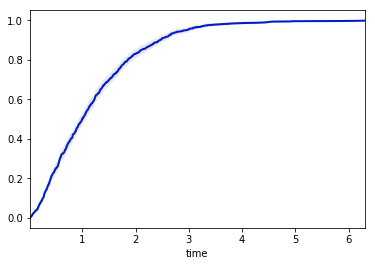

In [137]:
# plot data
##### plot properties #####
linewidth = 2.0
line_color = (0, 0.1, 0.8, 1.0)
shade_color = (0.1, 0.1, 0.1, 0.1)
runtime_plot_data.plot(x='time', y='success_rate',
                       color=line_color, linewidth=linewidth,
                      legend=False)
times = runtime_plot_data.loc[:, 'time'].values
success_rates = runtime_plot_data.loc[:, 'success_rate'].values
wilson_confs = runtime_plot_data.loc[:, 'wilson_confidence'].values
plt.fill_between(times, success_rates - wilson_confs, success_rates + wilson_confs, facecolor=shade_color)
plt.show()